In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import os
import sys

#### load `catwise_agns_corr_masked.fits`

This is result of correcting the initial catalogs retrieved from IPAC for extinction, correcting positions and proper motions, making magnitude cuts, and masking using `MASKS_exclude_master_final.fits` (steps 2-3 in `README`).

In [3]:
cattab = Table.read(f'/scratch/aew492/quasars/catalogs/catwise2020/catwise_agns_corr_masked.fits', format='fits')

#### construct "master" catalog

This "master" catalog will will be a duplicate of `catwise_agns_corr_masked.fits` but with the additional cut `w1cov >= 80`; i.e. a duplicate of `catwise_agns_masked_final.fits` but without the galactic plane cut and keeping all sources $W1\leq 16.5$.

In [6]:
min(cattab['w1']), max(cattab['w1']), min(cattab['w1']-cattab['w2'])

(9.000860179901123, 16.499999538481237, 0.8000002727136017)

In [7]:
sum(cattab['w1cov'] < 80)

471

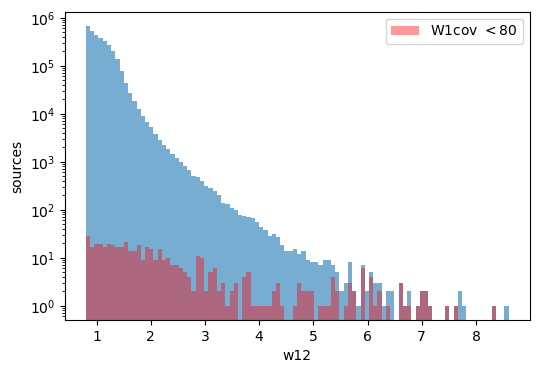

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
_, bins, _ = ax.hist(cattab['w12'], bins=100, alpha=0.6)
_, _, _ = ax.hist(cattab['w12'][cattab['w1cov'] < 80], bins=bins, color='r', alpha=0.4,
                  label='W1cov $<80$')
ax.set_yscale('log')
ax.set_xlabel('w12')
ax.set_ylabel('sources')
ax.legend()

In [12]:
cattab_ = cattab[cattab['w1cov'] >= 80]

In [13]:
cattab_.columns

<TableColumns names=('source_id','ra','dec','sigra','sigdec','sigradec','w1cov','w2cov','meanobsmjd','pmra','pmdec','sigpmra','sigpmdec','ebv','w1','w2','w1e','w2e','w12','w12e','tile','l','b','elon','elat','radius','radius2','pa')>

In [15]:
cattab_.keep_columns(names=('source_id', 'ra', 'dec', 'w1', 'w2', 'w12', 'l', 'b', 'elon', 'elat', 'radius', 'radius2', 'pa'))

In [16]:
cattab_

source_id,ra,dec,w1,w2,w12,l,b,elon,elat,radius,radius2,pa
,deg,deg,mag,mag,mag,deg,deg,deg,deg,,,
bytes27,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
0000m016_b0-005603,359.41333750412764,-2.167267788407,16.136144306216387,14.989762870578096,1.1463814356382915,93.36046431987428,-61.91100125480427,358.5994638365189,-1.755045763918577,0,0,0
0000m016_b0-010596,0.5450644041276,-1.177598988407,16.410673971552402,15.369449314290657,1.0412246572617452,96.40152494864323,-61.485784856383,0.0315948577830099,-1.2972316580992056,0,0,0
0000m016_b0-005401,359.3693827041276,-1.7931065884069999,15.949601848069578,15.127401231968776,0.8222006161008029,93.62288294310186,-61.555357561551205,358.7080846825455,-1.3943010138585823,0,0,0
0000m016_b0-008110,0.0617950041276,-1.175226988407,16.42132615067437,15.139884100371972,1.2814420503023989,95.48058894820512,-61.28840869196749,359.58916065153176,-1.102823551893205,0,0,0
0000m016_b0-007151,359.82987120412764,-1.977838988407,16.2090501662679,15.208700110612437,1.0003500556554634,94.331730904729,-61.920453287741665,359.05694149169165,-1.7469151408832042,0,0,0
0000m016_b0-007695,359.7304187041276,-1.2496416884069999,16.400703154079615,15.19946876938641,1.2012343846932048,94.78964438756488,-61.21857504577585,359.255542876,-1.039288519489612,0,0,0
0000m016_b0-006651,359.65309700412763,-0.8613792884070001,16.161107676368207,15.321738450834527,0.8393692255336802,94.9801693285279,-60.8335987592685,359.339081045451,-0.6523166777257233,0,0,0
0000m016_b0-001610,359.3862815041276,-1.414645588407,14.723843141339719,13.526228760970756,1.1976143803689627,93.9971234549282,-61.221587834110984,358.8741893650386,-1.0538014107795688,0,0,0


In [19]:
cattab_.write('/scratch/aew492/quasars/catalogs/catwise2020/catwise_agns_master.fits', format='fits')

#### $|b|>25^\circ$

In [20]:
cattab_b25 = cattab_[np.abs(cattab_['b'])>25]

In [21]:
len(cattab_b25)

1824756

In [25]:
cattab_b25.write('/scratch/aew492/quasars/catalogs/catwise2020/catwise_agns_master_bcuts/catwise_agns_bcut25.fits', format='fits')

#### $|b|>35$

In [23]:
cattab_b35 = cattab_[np.abs(cattab_['b'])>35]

In [24]:
len(cattab_b35)

1373381

In [26]:
cattab_b35.write('/scratch/aew492/quasars/catalogs/catwise2020/catwise_agns_master_bcuts/catwise_agns_bcut35.fits', format='fits')